# XGBoost的基础思想与实现

## 1 XGBoost pk梯度提升树

极限提升树KGBoost(Extreme Gradient Boosting,XGB,发音/eks-g-boost/0)是基于梯度提升树GBDT全面升级的新一代提升算法，也是提升家族中最富盛名、最灵活、最被机器学习竞赛所青睐的算法。不同于我们之前学过的任意单一算法，XGBoost是一个以提升树为核心的算法系统，它覆盖了至少3+建树流程、10+损失函数，可以实现各种类型的梯度提升树，灵活性无与伦比。同时，XGBoost天生被设计成支持巨量数据，因此可以自由接入GPU/分布式/数据库等系统、还创新了众多工程上对传统提升算法进行加速的新方法。可以说，XGBoost是21世纪中Boosting算法的又一个里程碑，它开创了后GBDT时代中Boosting算法的新辉煌。

**需要注意的是，学习XGBoost需要大量梯度提升树(GBDT)相关知识，本课程将假设你已经非常熟悉梯度提升树的原理与特点、并且熟悉sklearn中的交叉验证的用法。如果你不熟悉梯度提升树，强烈建议你回顾之前的课程。**

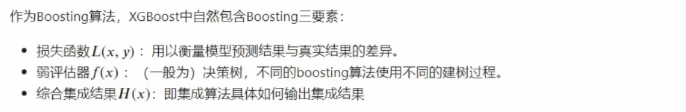

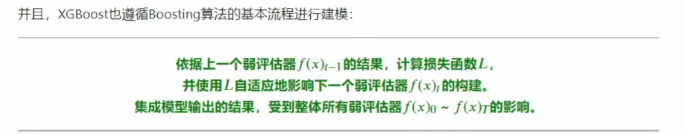

当然，XGB00st真实的流程比上述过程复杂得多。虽然梯度提升树的流程本身已经比较复杂，XGB00st还是在此流程上做出了众多关键的改进。综合来看，这些改进都是基于XGB00t中两种非常关键的思想实现的：

* **第一，实现精确性与复杂度之间的平衡**

树的集成模型是机器学习中最为强大的学习器之一，这一族学习器的特点是精确性好、适用于各种场景，但运行缓慢、且过拟合风险很高，因此从学习单一决策树时起，我们就持续为大家提供丰富的剪枝策略，目的就是为了降低各种树榄型的榄型复杂度，从而控制住过拟合。树模型的学习能力与过拟合风险之间的平衡，就是预测精确性与模型复杂度之间的平衡，也是经验风险与结构风险之间的平衡，这一平衡对决策树以及树的集成模型来说是永恒的议题。

在过去，我们总是先建立效果优异的模型，再依赖于手动剪枝来调节树模型的复杂度，但在XGB00st中，精确性与复杂度会在训练的每一步被考虑到。主要体现在：

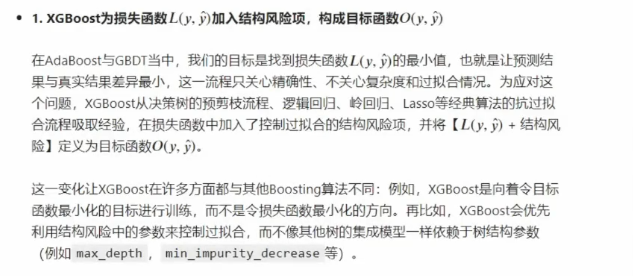

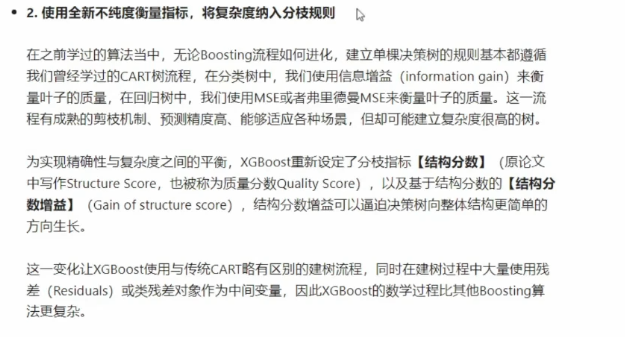

* **第二，极大程度地降低模型复杂度、提升模型运行效率，将算法武装成更加适合于大数据的算法**

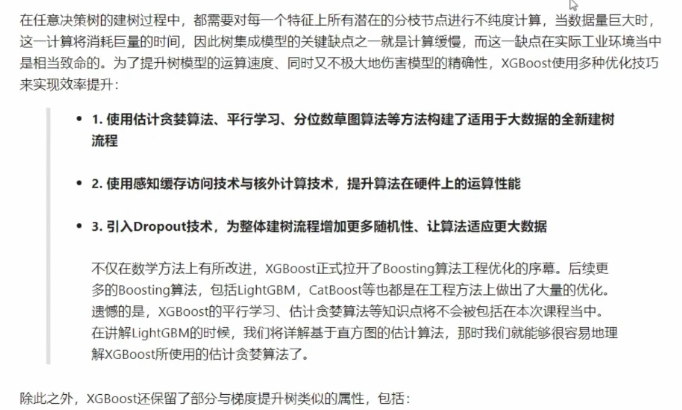

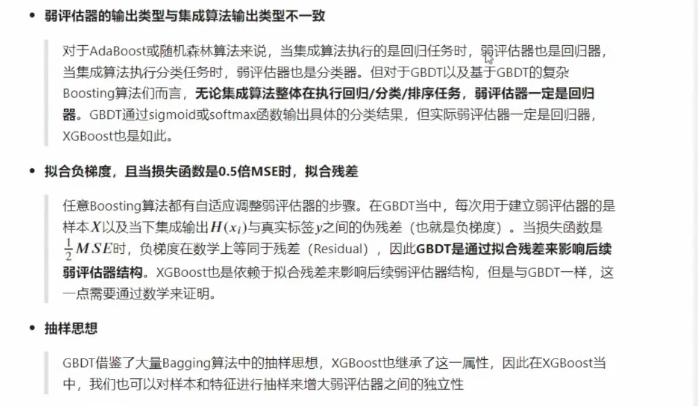

因为存在这些相似之处，因此我们将会在XGB005的参数中看到部分熟悉的参数，如果你对梯度提升树足够熟悉，那KGBoost的许多参数对你来说应该并不难懂。需要注意的是，作为2014年才被正式提出的Boosting算法，XGBoost是一个独立于经典算法的算法系统，因此xgboost库是需要单独安装的。

In [1]:
!pip install xgboost

     ---------------------------------------- 99.8/99.8 MB 5.1 MB/s eta 0:00:00


需要注意的是，windows与linuxi系统下支持单GPU运算，但Mac系统不支持GPU运算。同时，只有Linux系统支持多GPU联合运算，其他系统不支持、如果pip安装失败，则可以删除后参考该页面进行具体安装：